# MAC Address De-Randomization for Device Counting

## Introduction

Welcome to this lecture on MAC Address De-Randomization!

MAC address de-randomization is an essential topic in the field of network security and privacy. In this lecture, we'll delve into the process of unraveling the randomized MAC addresses utilized by devices to maintain anonymity on networks. By understanding the techniques involved, you'll gain insights into how to analyze and potentially identify devices based on their MAC addresses, even when they attempt to obfuscate their identities.

Today's lecture is structured as follows:

1. **Dataset Manipulation**:
   1. **Data Cleaning**: We'll start by preparing our dataset, ensuring it is in a suitable format for analysis. This involves removing any inconsistencies or irrelevant information that could skew our results.
   2. **Random Subset Generation**: To facilitate our analysis, we'll generate random subsets of our dataset. This allows us to test our methodology against different combinations of devices, thereby assessing its effectiveness.
2. **Feature Analysis**: Here, we'll explore the various features present in our dataset. Understanding these features is crucial for identifying patterns and correlations that could aid us in MAC address de-randomization.
3. **Probe Burst Clustering**: Probe burst clustering is a technique used to group together MAC addresses based on their characteristics. By identifying clusters of probe requests with randomized MAC addresses, we can, for example, infer the number of devices in a room.
4. **Device Counting**: Finally, we'll explore methods for counting the number of unique devices present in our dataset. This step is essential for understanding the scale of the network and assessing the effectiveness of our de-randomization techniques.

Throughout this lecture, we'll provide explanations and demonstrations to help you grasp the concepts effectively.

### Randomization Recap

Understanding how to identify randomized MAC addresses is pivotal in network analysis. One key indicator lies in the 2nd least significant bit (`B1`) of the first byte of the MAC address. When this bit is set, it signals that the MAC address was randomized by the network controller of the User Equipment (UE), typically for privacy reasons.

Moreover, individual devices and device groups are distinguished by the least significant bit (`B0`) of the first byte.

<img src="../images/mac-address-structure.png" width=500px/>

MAC addresses are commonly represented in hexadecimal format, where each digit corresponds to four binary bits.

Given the constraints, the 2nd digit of a locally assigned MAC address in hexadecimal format offers only four possibilities:
- 2 (`0010`)
- 6 (`0110`)
- A (`1010`)
- E (`1110`)

This limitation aids in swiftly identifying MAC addresses that have undergone randomization, facilitating their detection and analysis within network environments.

### Libraries and Modules

You can install new Python libraries in your Colab notebook using `%pip install <library>`. In the following code block we will install the libraries needed in the rest of the notebook.

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Handling Data

In the initial step of our data analysis process, we import the `pandas` library. Pandas is a powerful Python library used for data manipulation and analysis. By importing pandas, we gain access to its rich set of functions and data structures, which will be instrumental in handling and exploring our dataset effectively throughout the notebook.

In [ ]:
# Use only w/ Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import os

In this step, we're consolidating data from multiple `.CSV` files located within the `data/CSV/` directory into a single pandas DataFrame called `combined_df`. This approach allows us to streamline our data analysis process by accessing all relevant information within one structured dataset.

In [3]:
# Base directory containing the folders
# base_dir = "../data/lecture/"

# Google Colab base directory
base_dir = "/content/drive/data/lecture"

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".csv"):
            # Construct the full file path
            file_path = os.path.join(root, file)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Store the DataFrame in the dictionary with a unique key (e.g., file name)
            dataframes[file] = df

# Concatenate all DataFrames in the dictionary into a single DataFrame
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Converting the Timestamp column to datetime
combined_df["Timestamp"] = pd.to_datetime(combined_df["Timestamp"], unit="s")

The imported data should look something like this.

In [4]:
combined_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2021-06-30 16:56:01.255227089,26:48:73:18:ff:30,6,7.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
1,2021-06-30 16:56:01.300718069,86:b8:89:d5:35:5a,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
2,2021-06-30 16:56:01.346507072,d2:a7:fc:a6:e6:12,1,3.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
3,2021-06-30 16:56:01.366745949,d2:a7:fc:a6:e6:12,1,3.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
4,2021-06-30 16:56:01.393847942,06:3f:62:63:54:b9,6,8.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-06-23 08:54:49.142354012,9a:dd:95:de:40:3e,6,6.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,113,iPhoneXR-U
4984,2021-06-23 08:54:49.167303085,9a:dd:95:de:40:3e,11,11.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,101,iPhoneXR-U
4985,2021-06-23 08:54:49.187511921,9a:dd:95:de:40:3e,11,11.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,101,iPhoneXR-U
4986,2021-06-23 08:59:19.119399071,2e:cf:5a:3c:e6:ee,6,6.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,113,iPhoneXR-U


In [5]:
combined_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2021-06-30 16:56:01.255227089,26:48:73:18:ff:30,6,7.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
1,2021-06-30 16:56:01.300718069,86:b8:89:d5:35:5a,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
2,2021-06-30 16:56:01.346507072,d2:a7:fc:a6:e6:12,1,3.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
3,2021-06-30 16:56:01.366745949,d2:a7:fc:a6:e6:12,1,3.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
4,2021-06-30 16:56:01.393847942,06:3f:62:63:54:b9,6,8.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-06-23 08:54:49.142354012,9a:dd:95:de:40:3e,6,6.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,113,iPhoneXR-U
4984,2021-06-23 08:54:49.167303085,9a:dd:95:de:40:3e,11,11.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,101,iPhoneXR-U
4985,2021-06-23 08:54:49.187511921,9a:dd:95:de:40:3e,11,11.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,101,iPhoneXR-U
4986,2021-06-23 08:59:19.119399071,2e:cf:5a:3c:e6:ee,6,6.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,113,iPhoneXR-U


In [6]:
combined_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2021-06-30 16:56:01.255227089,26:48:73:18:ff:30,6,7.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
1,2021-06-30 16:56:01.300718069,86:b8:89:d5:35:5a,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
2,2021-06-30 16:56:01.346507072,d2:a7:fc:a6:e6:12,1,3.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
3,2021-06-30 16:56:01.366745949,d2:a7:fc:a6:e6:12,1,3.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
4,2021-06-30 16:56:01.393847942,06:3f:62:63:54:b9,6,8.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-06-23 08:54:49.142354012,9a:dd:95:de:40:3e,6,6.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,113,iPhoneXR-U
4984,2021-06-23 08:54:49.167303085,9a:dd:95:de:40:3e,11,11.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,101,iPhoneXR-U
4985,2021-06-23 08:54:49.187511921,9a:dd:95:de:40:3e,11,11.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,101,iPhoneXR-U
4986,2021-06-23 08:59:19.119399071,2e:cf:5a:3c:e6:ee,6,6.0,2d4017ff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,02040b16,0c1218243048606c,NaN,NaN,113,iPhoneXR-U


## Feature Analysis

This section is dedicated to exploring and visualizing the dataset's columns. By examining the data's characteristics and patterns, we aim to identify features that can aid in distinguishing between devices. To achieve this goal, we are leveraging `matplotlib` and `seaborn` libraries to generate charts and diagrams. These visualizations will provide valuable insights into the dataset's structure and help us uncover meaningful patterns for device identification and classification.

In [7]:
# Calculate the sum of NaN values in each column
nan_sum = combined_df.isna().sum()

# Calculate the total number of rows
total_rows = len(combined_df)

# Calculate the percentage of NaN values in each column
nan_percentage = (nan_sum / total_rows) * 100

# Create a DataFrame to display the results
nan_df = pd.DataFrame(
    {"Column": nan_percentage.index, "Percentage of NaN": nan_percentage.values}
)

nan_df

,Column,Percentage of NaN
0,Timestamp,0.000000
1,MAC Address,0.000000
2,Channel,0.000000
3,DS Channel,0.581395
4,HT Capabilities,0.020048
5,Extended Capabilities,0.020048
6,Vendor Specific Tags,18.905373
7,SSID,91.439455
8,Supported Rates,0.000000
9,Extended Supported Rates,0.020048


<!-- # TODO: check percentages at the end (after all dataset changes) -->
It's noteworthy that a significant portion of the data in certain columns is missing. Specifically, 86.978% of the entries in the `SSID` column are empty, while 76.465% of the `VHT Capabilities` column and 69.168% of the `HE Capabilities` column are also devoid of information. Due to the high prevalence of missing data and their limited utility in discriminating between devices, we have decided to drop these columns from further analysis.

In [8]:
# Retrieving columns with more than 60% NaN values
empty_columns = nan_percentage[nan_percentage > 60].index

print("\nColumns with more than 60% NaN values:")
for column in empty_columns:
    print(f"\t - {column}")


Columns with more than 60% NaN values:
	 - SSID
	 - VHT Capabilities
	 - HE Capabilities


Before dropping the `SSID` column, it's crucial to note that for the few Probe Requests that include it, the Length parameter is closely related to the length of the `SSID`. Therefore, to obtain the actual length of the Probe Request, we need to subtract this parameter from the reported length. This adjustment ensures accurate measurement of the Probe Request length and prevents potential discrepancies in our analysis.

In [9]:
combined_df["Length"] = combined_df.apply(
    lambda row: (
        row["Length"] - len(row["SSID"])
        if isinstance(row["SSID"], str)
        else row["Length"]
    ),
    axis=1,
)

In [10]:
combined_df.drop(empty_columns, axis=1, inplace=True)

We are currently evaluating the number of unique features present in the dataset. It's important to note that when a feature exhibits minimal variation between devices, resulting in only a few unique values, it can hinder MAC de-randomization efforts. This is because a low diversity of values increases the probability of collision, where different devices share the same value for the feature. Consequently, the effectiveness of distinguishing between devices based on such features is compromised. Identifying and prioritizing features with a wider range of unique values is crucial for successful MAC de-randomization and accurate device identification.

In [11]:
# Create a dataframe with the combined_df columns and unique value counts
unique_values_df = pd.DataFrame(
    {"Column": combined_df.columns, "Number of Unique Values": combined_df.nunique()}
).reset_index(drop=True)

# Print the dataframe
unique_values_df

,Column,Number of Unique Values
0,Timestamp,4988
1,MAC Address,718
2,Channel,3
3,DS Channel,13
4,HT Capabilities,8
5,Extended Capabilities,7
6,Vendor Specific Tags,5
7,Supported Rates,4
8,Extended Supported Rates,2
9,Length,14


In [12]:
# Print number of unique values for Label
print(f"Total number of devices in the dataset → {combined_df['Label'].nunique()}")

Total number of devices in the dataset → 7


### Feature Encoding

Before visualizing data, we want to encode each value, in order bla bla bla. To do so, define a function, namely `label_encode_with_exception`, which uses `scikitlearn`'s `LabelEncoder` to encode different value, while maintaining the `-1` value we used before for missing data.

Before encoding, it's crucial to ensure that each column has the appropriate data type assigned. This can be efficiently done within the same loop iteration used for encoding.

In [13]:
features = [
    "HT Capabilities",
    "Extended Capabilities",
    "Vendor Specific Tags",
    "Supported Rates",
    "Extended Supported Rates",
    "Length",
]

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Apply label encoding to the features
for column in features:
    if column != "Length":  # Length is already a number
        label_encoder = LabelEncoder()
        combined_df[column] = label_encoder.fit_transform(
            combined_df[column].astype(str)
        )

In [16]:
combined_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2021-06-30 16:56:01.255227089,26:48:73:18:ff:30,6,7.0,6,5,5,1,0,143,iPhone12_W
1,2021-06-30 16:56:01.300718069,86:b8:89:d5:35:5a,6,5.0,6,5,5,1,0,143,iPhone12_W
2,2021-06-30 16:56:01.346507072,d2:a7:fc:a6:e6:12,1,3.0,6,5,5,1,0,143,iPhone12_W
3,2021-06-30 16:56:01.366745949,d2:a7:fc:a6:e6:12,1,3.0,6,5,5,1,0,143,iPhone12_W
4,2021-06-30 16:56:01.393847942,06:3f:62:63:54:b9,6,8.0,6,5,5,1,0,143,iPhone12_W
...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-06-23 08:54:49.142354012,9a:dd:95:de:40:3e,6,6.0,5,5,5,0,0,113,iPhoneXR-U
4984,2021-06-23 08:54:49.167303085,9a:dd:95:de:40:3e,11,11.0,5,5,5,0,0,101,iPhoneXR-U
4985,2021-06-23 08:54:49.187511921,9a:dd:95:de:40:3e,11,11.0,5,5,5,0,0,101,iPhoneXR-U
4986,2021-06-23 08:59:19.119399071,2e:cf:5a:3c:e6:ee,6,6.0,5,5,5,0,0,113,iPhoneXR-U


### Burst View


We are now grouping Probe Requests by MAC Address to visualize the behavior of a so-called *burst*. It's essential to note that within a single burst, MAC Addresses remain unchanged and can thus be grouped together.

In the figures below, the horizontal axis represents the frame number: basically time. Each MAC Address is represented by a distinct color. Observing the figures, we notice that MAC Addresses change between consecutive bursts, but remain constant within a single burst.

This visualization allows us to discern patterns and trends in the behavior of devices during bursts of Probe Requests. By identifying changes and similarities between bursts, we gain insights into the dynamics of device activity and communication within the network.

<img src="../images/probe-bursts.jpg" height=100px/>


Before grouping, it's crucial to ensure that numerical columns are converted to the correct data type. This ensures accuracy in subsequent calculations, especially when computing metrics like the mean of each group. By assigning the appropriate data types to numerical columns beforehand, we prevent potential errors and ensure consistency in our analysis.

In [17]:
# List of numerical columns
numeric_columns = ["Channel", "DS Channel"] + features

# Set correct data type
combined_df[numeric_columns] = combined_df[numeric_columns].astype(float)

Now we can drop the `Timestamp`, since for this lecture we are not interested in time-related features. After that we can group the Probe Requests in the dataset by `MAC Address`, in order to switch to a **burst-view**.

In [18]:
burst_df = (
    combined_df.drop(columns=["Timestamp"])
    .groupby(["MAC Address"])
    .first()
    .reset_index()
)

It is always a good idea to check the data we are working with, every time we make some changes. Let's check how many trains (bursts) of Probe Requests each device transmitted.

In [19]:
label_counts = burst_df["Label"].value_counts()
print(label_counts)

Label
iPhone11-C_a      334
iPhone12_W        147
HuaweiHonor9_R     89
iPhone6_N          57
iPhoneXR-U         36
S21Ultra-M_a       28
SamsungJ6_K        27
Name: count, dtype: int64


### Data Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

We are now plotting **heatmaps** to represent the contingency table of one feature with respect to another. This type of plot is essential for visualizing the relationships and dependencies between different features in our dataset.

The importance of using heatmaps lies in their ability to provide a clear and intuitive visualization of the associations between categorical variables. By displaying the frequency of occurrences of different combinations of feature values, heatmaps allow us to identify patterns, correlations, and dependencies that may exist between the features.

A **contingency table**, also known as a cross-tabulation or crosstab, is a tabular representation of the joint distribution of two or more categorical variables. Each cell in the table represents the frequency or count of occurrences of a specific combination of values from the categorical variables. In the context of heatmaps, the contingency table provides the raw data used to generate the heatmap, displaying the frequency of occurrences of different combinations of feature values.

In [21]:
def plot_heatmap(
    df: pd.DataFrame, column1: str, column2: str, colormap="Blues"
) -> None:

    # Compute a contingency table / cross-tabulation
    crosstab = pd.crosstab(df[column1], df[column2])

    # Create the heatmap
    sns.set_theme(style="whitegrid", font_scale=1)
    plt.figure(figsize=(15, 10))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap=colormap)

    # Add title and labels
    plt.title(f"Heatmap of {column1} vs {column2}")
    plt.xlabel(column2)
    plt.ylabel(column1)

    # Show the plot
    plt.show()

#### Supported Rates

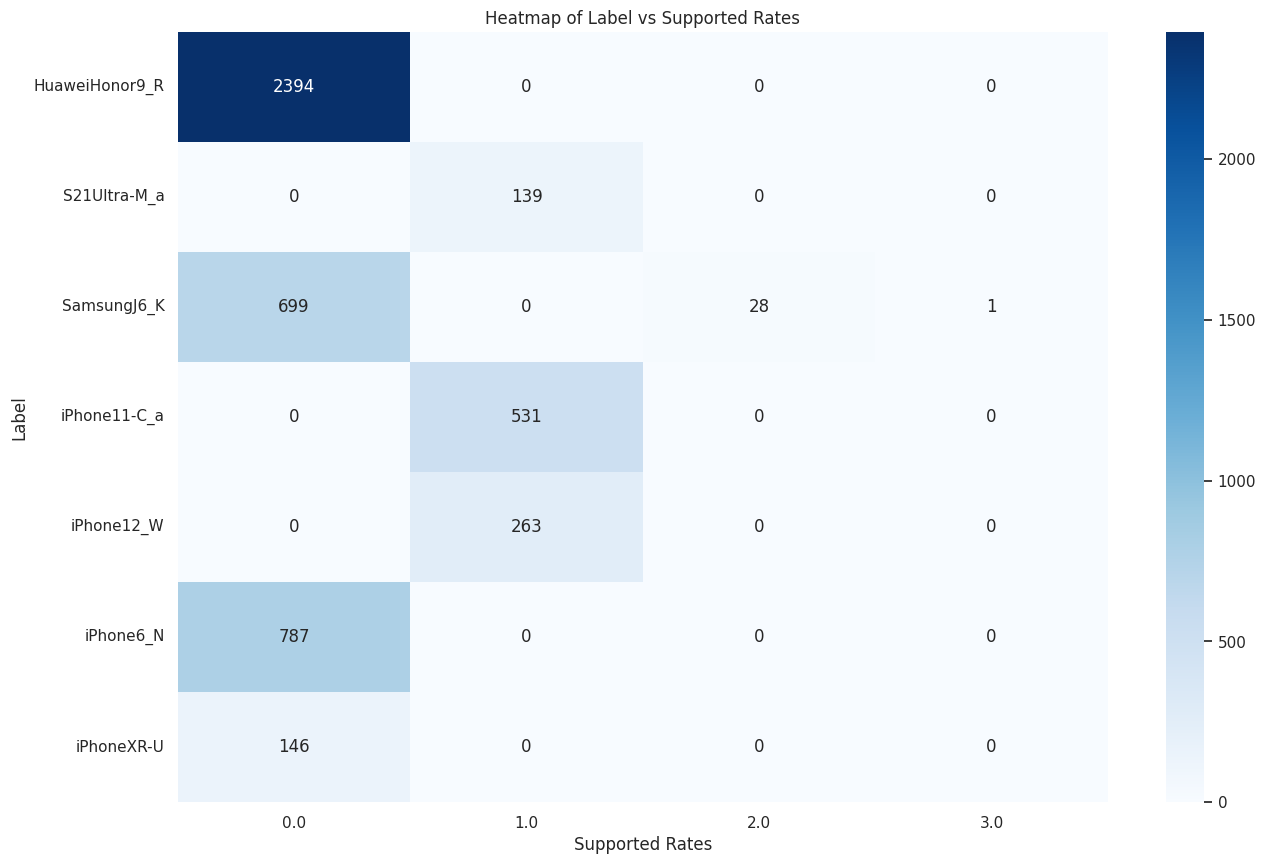

In [22]:
plot_heatmap(combined_df, "Label", "Supported Rates")

#### Extended Supported Rates

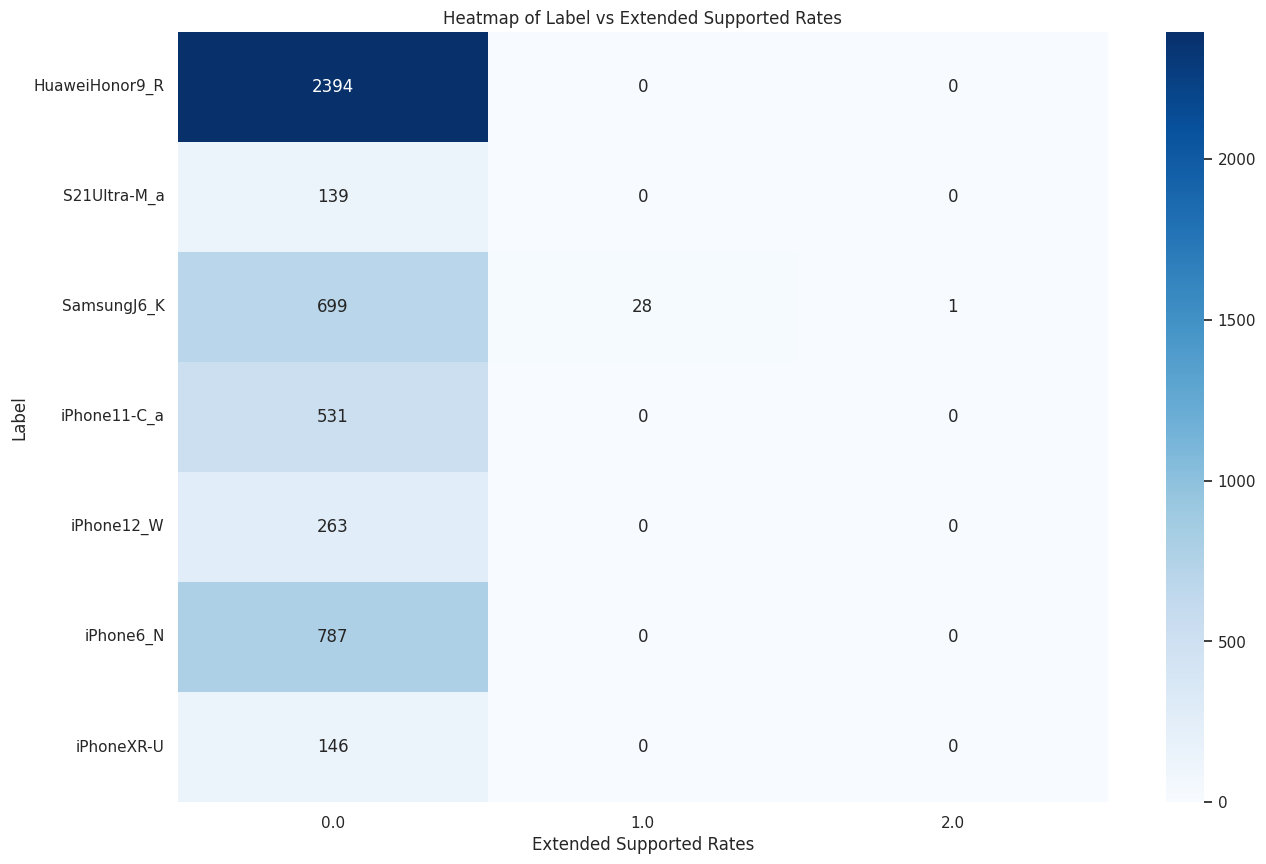

In [23]:
plot_heatmap(combined_df, "Label", "Extended Supported Rates")

#### HT Capabilities

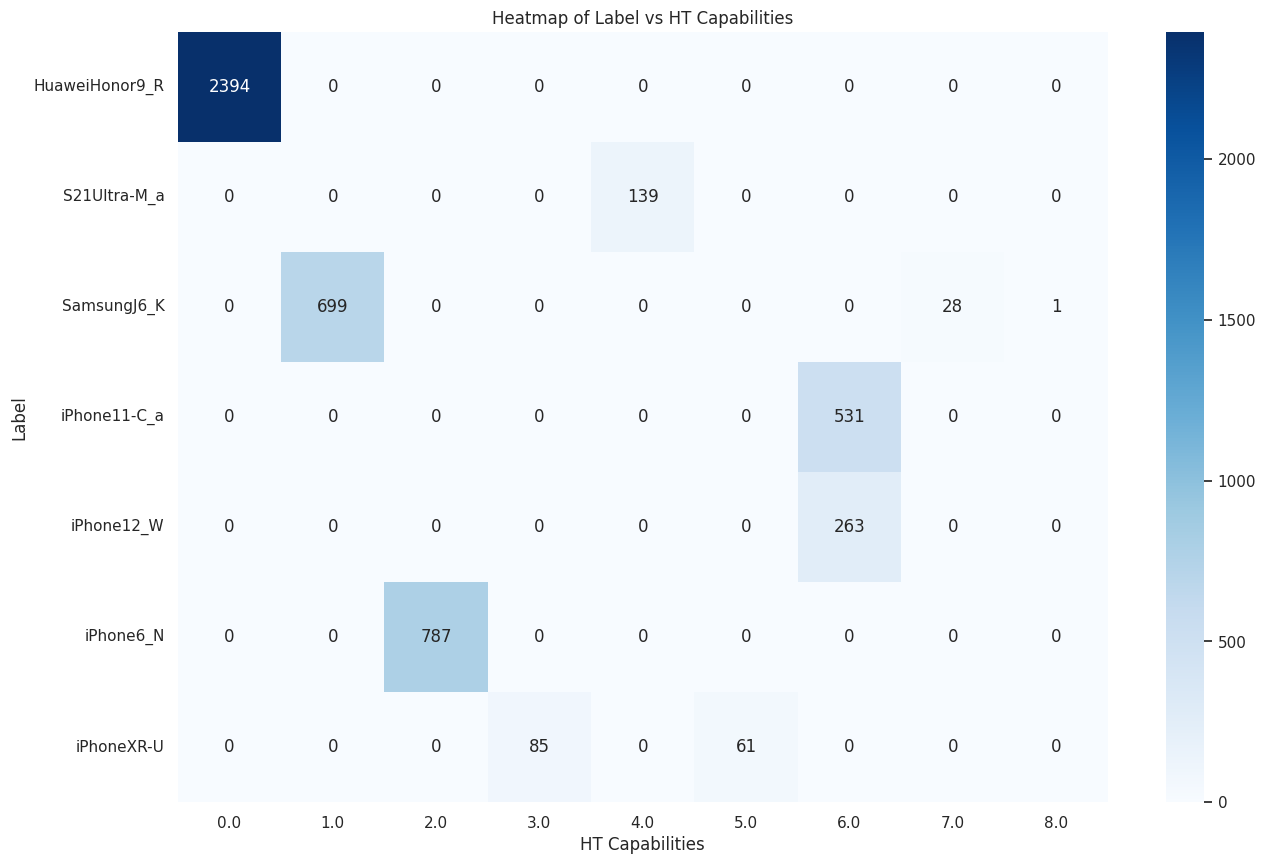

In [24]:
plot_heatmap(combined_df, "Label", "HT Capabilities")

#### Extended Capabilities

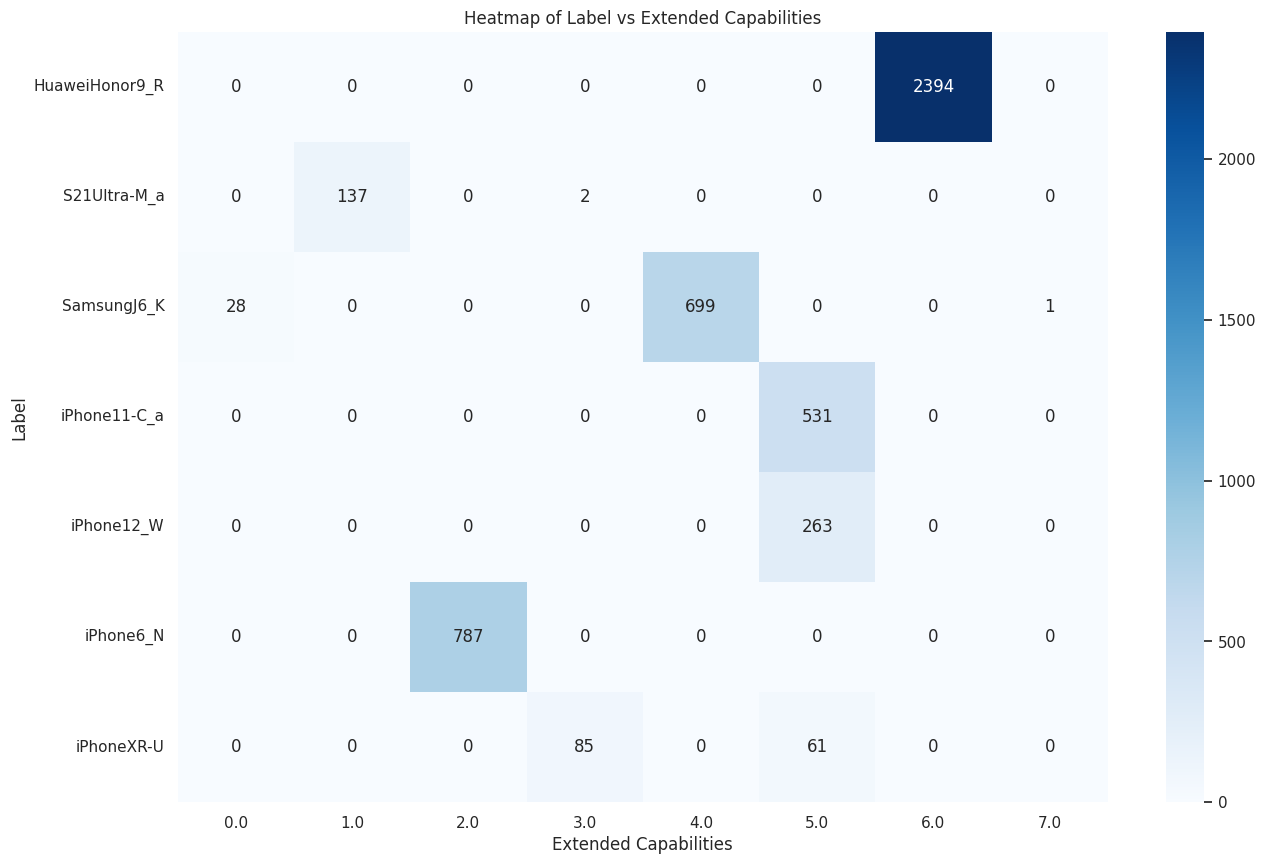

In [25]:
plot_heatmap(combined_df, "Label", "Extended Capabilities")

#### Vendor Specific Tags

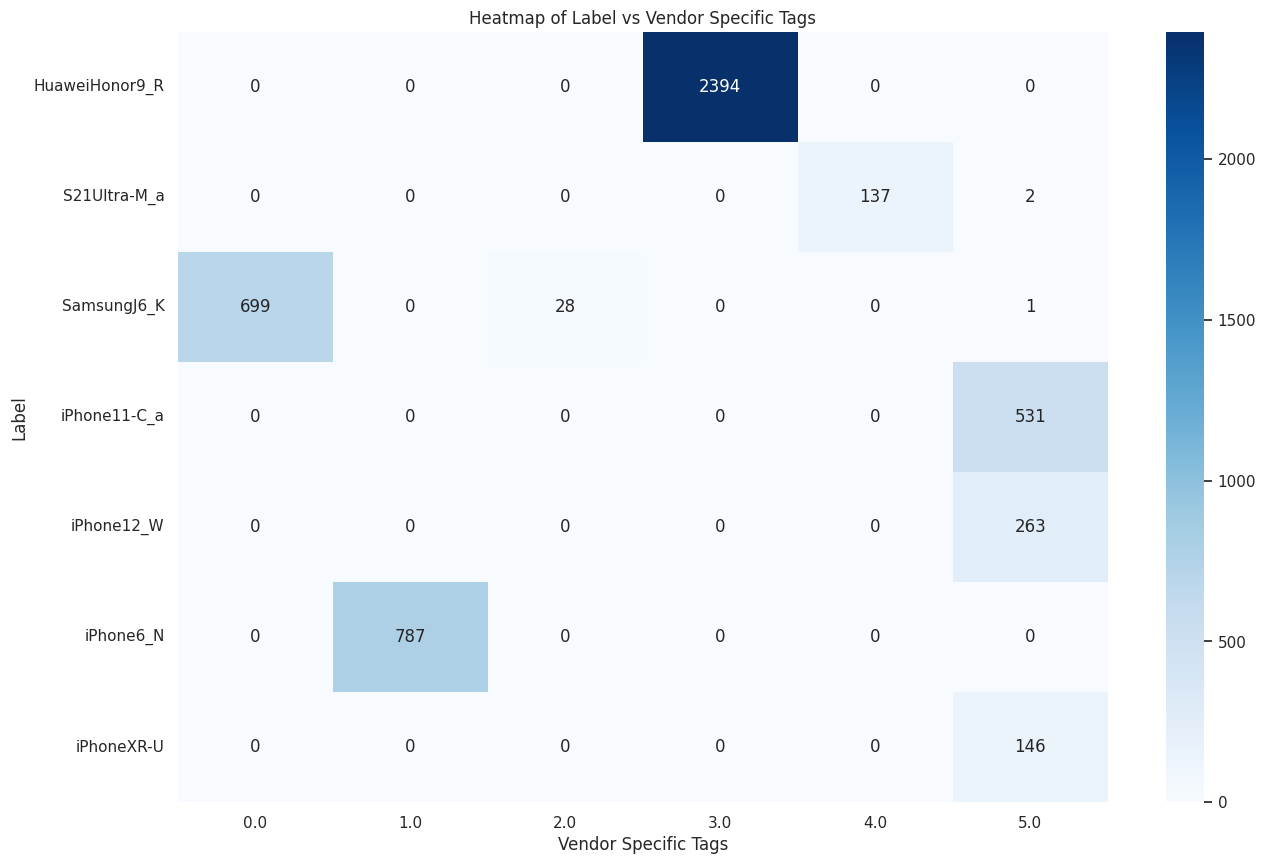

In [26]:
plot_heatmap(combined_df, "Label", "Vendor Specific Tags")

## Device Clustering

MAC Address de-randomization consists in a series of methodologies that aim at associating different probe requests transmitted by the same device, to their original source, even in presence of privacy-preserving mechanisms, such as MAC Address randomization (which is the most implemented, but there are also other techniques). In order to do so, one way could be the one of clustering techniques.

In [27]:
def cluster_dataframe(dataframe: pd.DataFrame, features: list) -> pd.Series:
    """
    Clusters the dataframe based on selected features using Pandas groupby functionality.

    Parameters:
    dataframe (pd.DataFrame): Input dataframe.
    features (list): List of feature columns to be used for clustering.

    Returns:
    pd.Series: A Series containing the cluster IDs for each row in the original dataframe.
    """
    # Group the dataframe by the selected features and assign a cluster ID to each group
    cluster_id = dataframe.groupby(features).ngroup()

    return cluster_id

Let's create a dataframe with just the features we need, as well as other two columns: `MAC Address` to identify each individual burst, and `Label`, the ground truth.

In [28]:
columns_to_keep = features
columns_to_keep.insert(0, "MAC Address")
columns_to_keep.append("Label")

clusters_df = burst_df[columns_to_keep].copy().reset_index()

In [29]:
selected_features = ["HT Capabilities", "Extended Capabilities"]

In [30]:
clusters_df["Cluster ID"] = cluster_dataframe(clusters_df, selected_features)

Let's check if everything went according to plan.

In [31]:
clusters_df

,index,MAC Address,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
0,0,00:0f:00:6a:68:8b,8.0,7.0,5.0,3.0,2.0,66.0,SamsungJ6_K,8
1,1,00:78:b5:8a:40:84,6.0,5.0,5.0,1.0,0.0,132.0,iPhone11-C_a,7
2,2,00:c6:7e:33:8c:62,6.0,5.0,5.0,1.0,0.0,132.0,iPhone11-C_a,7
3,3,00:cb:d6:50:04:2c,6.0,5.0,5.0,1.0,0.0,132.0,iPhone11-C_a,7
4,4,01:31:03:f5:11:4b,6.0,5.0,5.0,1.0,0.0,132.0,iPhone11-C_a,7
...,...,...,...,...,...,...,...,...,...,...
713,713,fe:7b:b8:60:08:c7,6.0,5.0,5.0,1.0,0.0,132.0,iPhone11-C_a,7
714,714,fe:9d:55:a5:9f:4a,6.0,5.0,5.0,1.0,0.0,143.0,iPhone12_W,7
715,715,fe:d8:06:8a:6a:09,3.0,3.0,5.0,0.0,0.0,113.0,iPhoneXR-U,3
716,716,fe:f9:fc:fb:83:9e,2.0,2.0,1.0,0.0,0.0,156.0,iPhone6_N,2


We can easily visualize how devices were clustered using a heatmap plot.

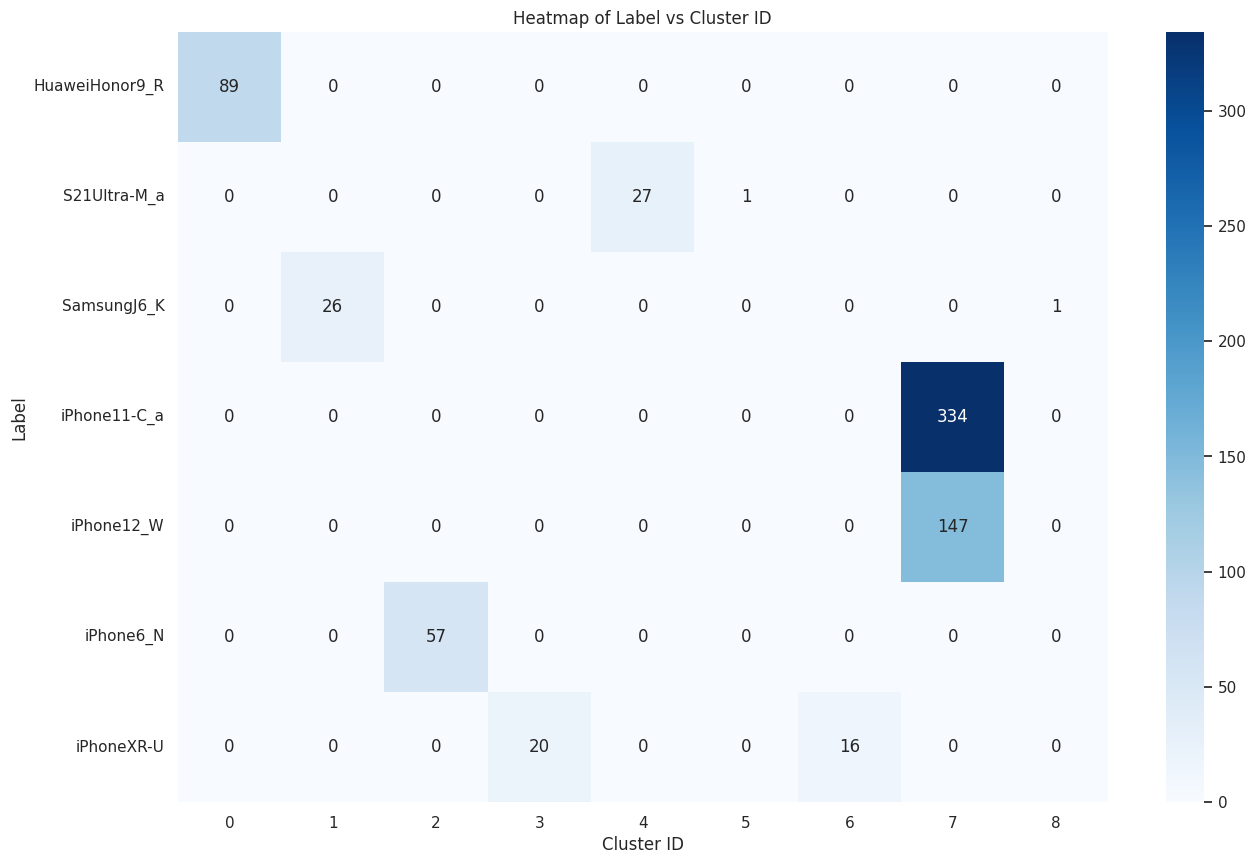

In [32]:
plot_heatmap(clusters_df, "Label", "Cluster ID")

## Evaluation Metrics

In evaluating clustering algorithms, several metrics play an important role in assessing their performance and effectiveness. The chosen metrics offer diverse perspectives on the quality and characteristics of the clustering results. *Mean Prediction Error* (MPE), *Root Mean Square Error* (RMSE), *Homogeneity*, *Completeness*, and *V-Measure* score are among the key evaluation metrics commonly used in clustering analysis.

### Root Mean Square Error (RMSE)

RMSE stands for *Root Mean Squared Error*. It's a commonly used metric in regression tasks to **quantify the average difference between the predicted values and the actual values**:

- Squared Errors: RMSE calculates the squared differences between predicted and actual values for each data point.

- Mean Squared Error (MSE): The squared errors are averaged to compute the Mean Squared Error.

- Root Mean Squared Error: RMSE is obtained by taking the square root of the Mean Squared Error. This makes RMSE interpretable in the same units as the original data, unlike MSE.

Lower RMSE values indicate better agreement between predicted and actual values.

In [33]:
import numpy as np

In [34]:
# Compute RMSE
def compute_rmse(actual_labels, cluster_ids):
    # Number of unique labels
    unique_labels = np.unique(actual_labels)
    num_unique_labels = len(unique_labels)
    print("Actual Labels:", num_unique_labels)

    # Number of clusters found
    num_clusters_found = len(np.unique(cluster_ids))
    print("Clusters found:", num_clusters_found)

    # Compute RMSE
    rmse = np.sqrt((num_clusters_found - num_unique_labels) ** 2)
    return rmse

And so the RMSE we get from our previous approach is:

In [35]:
rmse = compute_rmse(clusters_df["Label"], clusters_df["Cluster ID"])
print("-> RMSE:", rmse)

Actual Labels: 7
Clusters found: 9
-> RMSE: 2.0


### Homogeneity

Homogeneity in clustering is a measure of the extent to which clusters contain data points from a single class or category. It assesses the degree to which each cluster represents a distinct class in the dataset. A high homogeneity score indicates that clusters are pure, containing predominantly data points from one class. In contrast, a low homogeneity score suggests that clusters contain a mix of data points from different classes. It's an important metric for assessing the quality and coherence of clustering results, particularly when the **ground truth class labels are known**.

<img src="../images/homogeneity.jpg" height=300px/>

The homogeneity score $h$ is calculated as:

$$ h = 1 - \frac{H(C|K)}{H(C)} $$

Where:
- $H(C|K)$ is the conditional entropy of the class labels given the cluster assignments
- $H(C)$ is the entropy of the class labels

In [36]:
from sklearn.metrics import homogeneity_score

In [37]:
homogeneity = homogeneity_score(clusters_df["Label"], clusters_df["Cluster ID"])

In [38]:
print("Homogeneity Score:", homogeneity)

Homogeneity Score: 0.7323356101517207


### Completeness

Completeness is another clustering evaluation metric that measures the extent to which all data points belonging to the same class are assigned to the same cluster. In essence, it assesses whether all members of a given class are grouped into the same cluster.

A clustering result achieves completeness if all data points that are members of a given class are elements of the same cluster. A perfect completeness score of 1.0 indicates that each class is entirely contained within a single cluster.

Completeness, like homogeneity, is used to evaluate the quality of clustering algorithms and is often employed alongside other metrics such as homogeneity and V-measure for a comprehensive evaluation of clustering performance.

<img src="../images/completeness.jpg" height=300px/>

The completeness score $c$ is calculated:

$$ c = 1 - \frac{H(K|C)}{H(K)} $$

Where:
- $H(K|C)$ is the conditional entropy of the cluster assignments given the class labels
- $H(K)$ is the entropy of the cluster assignments

In [39]:
from sklearn.metrics.cluster import completeness_score

In [40]:
completeness = completeness_score(clusters_df["Label"], clusters_df["Cluster ID"])

In [41]:
print("Completeness Score:", completeness)

Completeness Score: 0.9604908932220794


### V-Measure

The V-Measure is a metric used for evaluating the quality of clustering results, particularly when the ground truth labels are known. It's a measure of the homogeneity and completeness of the clustering. The V-Measure is the harmonic mean of homogeneity and completeness. It can be calculated using the formula:

$$ V= 2\cdot \frac{h\cdot c}{h+c} $$

Where $h$ represents the homogeneity score and $c$ the completeness score, seen in the previous sections.


In [42]:
from sklearn.metrics import v_measure_score

In [43]:
v_measure = v_measure_score(clusters_df["Label"], clusters_df["Cluster ID"])

In [44]:
print("V-Measure Score:", v_measure)

V-Measure Score: 0.8310381281614914


### Using Library

Alternatively, we could just use the `homogeneity_completeness_v_measure` module from the `scikit-learn` library and get similar results.

In [45]:
from sklearn.metrics import homogeneity_completeness_v_measure

We just need to use as input the **true labels**, as well as the ones we got from the clustering process (*Cluster ID*).

In [46]:
# Compute homogeneity, completeness, and V-measure
h, c, v = homogeneity_completeness_v_measure(
    clusters_df["Label"], clusters_df["Cluster ID"]
)

And we can easily get the scores.

In [47]:
print("Homogeneity: \t", h)
print("Completeness: \t", c)
print("V-measure: \t", v)

Homogeneity: 	 0.7323356101517207
Completeness: 	 0.9604908932220794
V-measure: 	 0.8310381281614914


## Challenge

Implement a better clustering strategy, based on a threshold of equal features between Probe Request Bursts (i.e., sharing $N$% of features). Do **not** use ML models, such as K-Means, DBSCAN, etc.

Then perform MAC Address de-randomization for the devices in `data/challenge-dataset/` at various dataset sizes and for different thresholds of feature equality (e.g., $10, 20, 30, ..., 100$). Analyze the results and observe any patterns or trends in clustering metrics. What can you notice?

Finally, try to perform de-randomization on the unlabelled dataset in `data/unlabelled-challenge.csv`. How many devices are there?

> *Hint:* Observe the clustering metrics for different thresholds and dataset sizes from the first half of the challenge. Apply the insights gained to successfully solve the second half of the challenge.